In [245]:
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np


In [246]:
data = pd.read_excel('Litva.xls')
data.head(5)

,Country or Area,Year,Area,Sex,Age,Record Type,Reliability,Source Year,Value,Value Footnotes
0,Lithuania,2019,Total,Both Sexes,Total,Estimate - de jure,"Final figure, complete",2020.0,2794184.0,1.0
1,Lithuania,2019,Total,Both Sexes,0,Estimate - de jure,"Final figure, complete",2020.0,28166.0,1.0
2,Lithuania,2019,Total,Both Sexes,0 - 4,Estimate - de jure,"Final figure, complete",2020.0,147701.0,1.0
3,Lithuania,2019,Total,Both Sexes,1,Estimate - de jure,"Final figure, complete",2020.0,28894.0,1.0
4,Lithuania,2019,Total,Both Sexes,1 - 4,Estimate - de jure,"Final figure, complete",2020.0,119535.0,1.0


In [247]:
m = []
for i in np.arange(18,51):
    m.append(i)
print(m)


[18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


In [248]:

data = data[['Year',  'Sex', 'Age', 'Value']]
data = data[data['Sex'] == 'Male']

data3 = pd.Series()
for i in m:
    s = data[data['Age'] == int(i)]
    data3 = pd.concat([data3,s])

data3 = data3[['Age', 'Year', 'Value']]
data3.head()

,Age,Year,Value
159,18,2019,14880.0
711,18,2018,16053.0
712,18,2018,15466.0
1630,18,2017,16393.0
1631,18,2017,16734.0


(array([1985., 1990., 1995., 2000., 2005., 2010., 2015., 2020., 2025.]),
 [Text(1985.0, 0, '1985'),
  Text(1990.0, 0, '1990'),
  Text(1995.0, 0, '1995'),
  Text(2000.0, 0, '2000'),
  Text(2005.0, 0, '2005'),
  Text(2010.0, 0, '2010'),
  Text(2015.0, 0, '2015'),
  Text(2020.0, 0, '2020'),
  Text(2025.0, 0, '2025')])

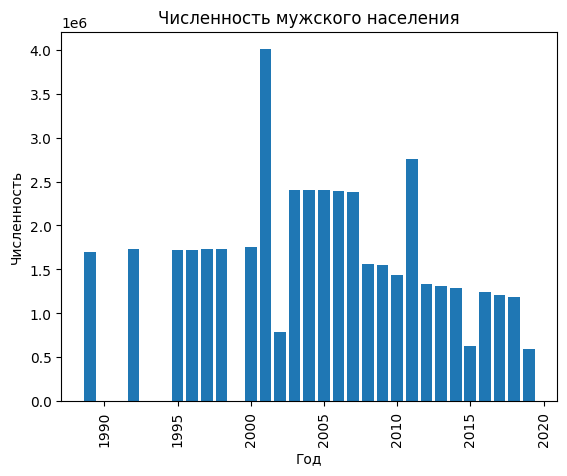

In [249]:
data = data3.groupby(['Year'], as_index=False)['Value'].sum().reset_index()
plt.ylabel('Численность')
plt.xlabel('Год')
plt.title('Численность мужского населения')
plt.bar(x=data['Year'], height=data['Value'])
plt.xticks(rotation=90)

In [250]:
data = pd.read_excel('Litva.xls')


In [251]:
data = data[['Year',  'Sex', 'Age', 'Value']]
data = data[data['Sex'] == 'Both Sexes']
data3 = pd.Series()
for i in m:
    s = data[data['Age'] == i]
    data3 = pd.concat([data3,s])
data3.head()

,0,Year,Sex,Age,Value
24,NaN,2019,Both Sexes,18,28932.0
453,NaN,2018,Both Sexes,18,31212.0
454,NaN,2018,Both Sexes,18,30072.0
1371,NaN,2017,Both Sexes,18,32306.0
1372,NaN,2017,Both Sexes,18,31759.0


(array([2000., 2010., 2020., 2030., 2040., 2050., 2060., 2070., 2080.]),
 [Text(2000.0, 0, '2000'),
  Text(2010.0, 0, '2010'),
  Text(2020.0, 0, '2020'),
  Text(2030.0, 0, '2030'),
  Text(2040.0, 0, '2040'),
  Text(2050.0, 0, '2050'),
  Text(2060.0, 0, '2060'),
  Text(2070.0, 0, '2070'),
  Text(2080.0, 0, '2080')])

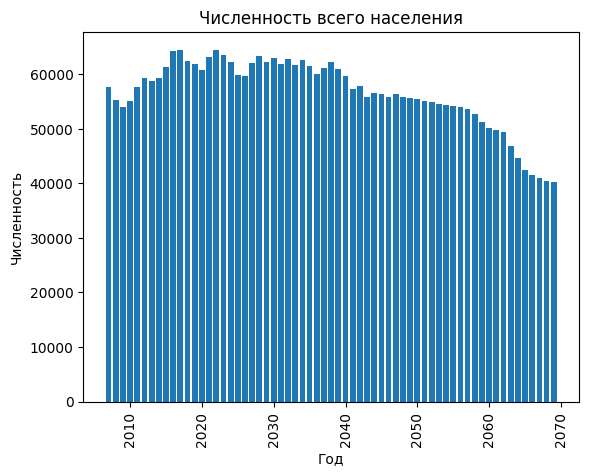

In [252]:
data = data3.groupby(['Year', 'Sex', 'Age'], as_index=False).agg({'Value': ['sum']})
plt.ylabel('Численность')
plt.xlabel('Год')
plt.title('Численность всего населения')
plt.bar(x=data3['Year']+data3['Age'], height=data3['Value'])
plt.xticks(rotation=90)

In [253]:
data = pd.read_excel('титаник.xls')


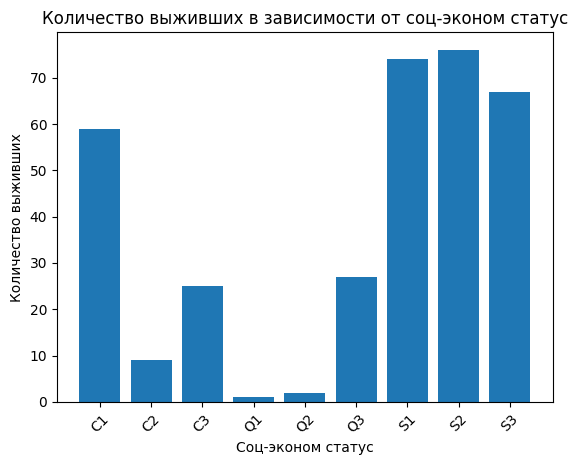

In [254]:
df = pd.DataFrame(data)
df = df[df['Survived'] == 1]

# Группируем данные по порту посадки и социально-экономическому статусу
grouped_df = df.groupby(['Embarked', 'Pclass'])['Survived'].count().reset_index()

# Построение гистограммы
plt.bar(grouped_df['Embarked'] + grouped_df['Pclass'].astype(str), grouped_df['Survived'])
plt.xlabel('Соц-эконом статус')
plt.ylabel('Количество выживших')
plt.title('Количество выживших в зависимости от соц-эконом статус')
plt.xticks(rotation=45)
plt.show()